In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [82]:
data = pd.read_csv('./Training Data/BostonHousing.csv')


In [83]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<Axes: >

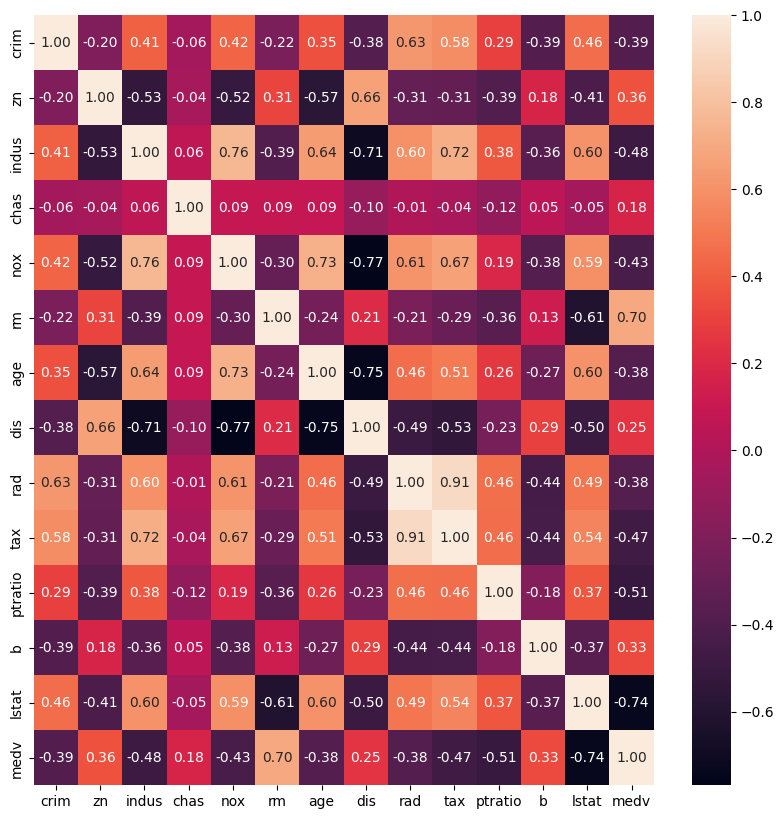

In [84]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.2f')

In [85]:
x = data.drop(columns=['medv']).values
y = data['medv'].values

In [86]:
x.shape

(506, 13)

In [11]:
y.shape

(506,)

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [36]:
x_train

array([[ 1.28770177, -0.50032012,  1.03323679, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [-0.40547014,  2.95931752, -1.30336132, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 0.85189733, -0.50032012,  1.03323679, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-0.38135592, -0.50032012, -0.35216694, ...,  1.15981657,
        -3.12158061, -0.25731635]], shape=(404, 13))

In [39]:
ypred = clf.predict(x_test)

In [40]:
mse = np.mean((y_test-ypred)**2)
mse

np.float64(24.29111947497386)

In [41]:
clf.score(x_test,y_test)

0.6687594935356274

In [43]:
r2_score(y_train,clf.predict(x_train))

0.7508856358979673

In [45]:
r2_score(y_test,clf.predict(x_test))


0.6687594935356274

In [87]:
data = pd.read_csv('./Titanic.csv')


In [88]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Sex', ylabel='count'>

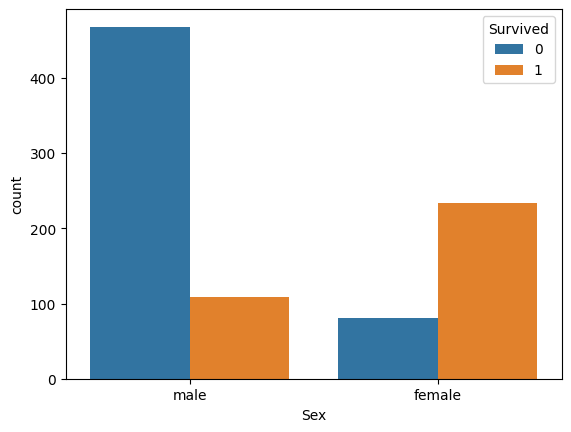

In [89]:
sns.countplot(data,x='Sex',hue='Survived')

In [90]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [91]:
cols_drop = ['PassengerId','Name','Ticket','Cabin']

In [92]:
data = data.drop(columns = cols_drop)

In [93]:
data.head()
pd.unique(data['Embarked'])

array(['S', 'C', 'Q', nan], dtype=object)

In [94]:
from sklearn.preprocessing import LabelEncoder
gender_enc = LabelEncoder()
port_enc = LabelEncoder()
data['Sex'] = gender_enc.fit_transform(data['Sex'])
data['Embarked'] = port_enc.fit_transform(data['Embarked'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [95]:
gender_enc.classes_

array(['female', 'male'], dtype=object)

In [96]:
port_enc.classes_

array(['C', 'Q', 'S', nan], dtype=object)

In [97]:
data = data.fillna(data['Age'].mean())

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [99]:
input_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
output_col = ['Survived']

X_data = data[input_cols]
Y_data = data['Survived']
X_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [100]:
print(X_data.shape,Y_data.shape)

(891, 7) (891,)


In [101]:
X_data = X_data.values
Y_data = Y_data.values

In [107]:
x_train,x_test,y_train,y_test = train_test_split(X_data,Y_data,train_size = 0.8,random_state = 42)

In [108]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [109]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [123]:
accuracy_score(y_train,clf.predict(x_train))

0.8019662921348315

In [124]:
accuracy_score(y_test,clf.predict(x_test))

0.8100558659217877

In [125]:
# Pclass Sex Age SibSp Parch Fare Embarked
xt = pd.DataFrame([[1,'female',21,1,2,50,'S']],columns=input_cols)

In [126]:
xt['Sex'] =  gender_enc.transform(xt['Sex'])
xt['Embarked'] = port_enc.transform(xt['Embarked'])
clf.predict(xt.values)

array([0])

In [129]:
xt = pd.DataFrame([[1,'male',21,1,2,100,'S']],columns=input_cols)

In [130]:
xt['Sex'] =  gender_enc.transform(xt['Sex'])
xt['Embarked'] = port_enc.transform(xt['Embarked'])
clf.predict(xt.values)

array([1])

In [132]:
from sklearn.metrics import confusion_matrix, classification_report,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
ypred = [1,1,0,0,0,1,0,1,1,1]
yac = [1,0,0,0,1,1,0,1,0,1]

In [134]:
cm = confusion_matrix(yac,ypred)

<Axes: >

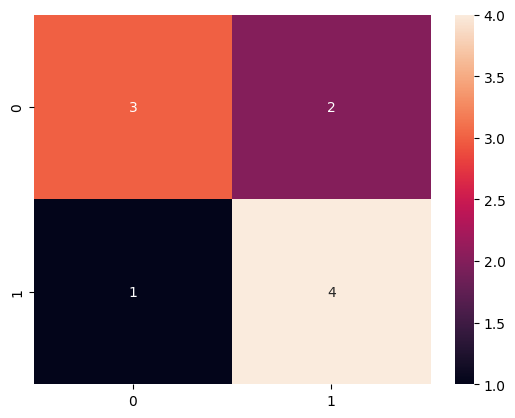

In [135]:
sns.heatmap(cm,annot=True)

<Axes: >

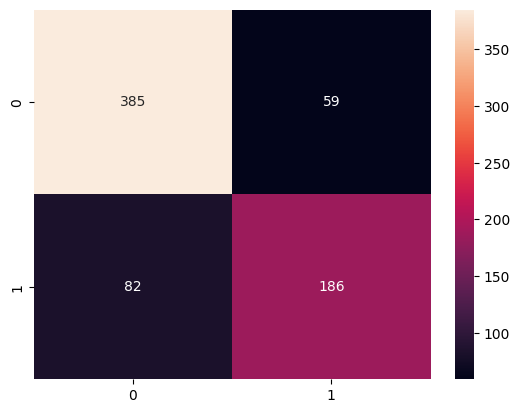

In [136]:
sns.heatmap(confusion_matrix(y_train,clf.predict(x_train)),annot = True,fmt='g')


In [137]:
print(classification_report(yac,ypred))


              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



In [138]:
print(classification_report(y_train,clf.predict(x_train)))


              precision    recall  f1-score   support

           0       0.82      0.87      0.85       444
           1       0.76      0.69      0.73       268

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712

